### Goal:

**apply my Pandas and Vizualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

#### Data:
https://github.com/fivethirtyeight/data

#### Further Reading
https://fivethirtyeight.com/features/fandango-movies-ratings/

**Question to answer : Is there a conflict of interest for a website that both sells movie tickets and displays review ratings ?**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
fandango = pd.read_csv('fandango_scrape.csv')

In [47]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [48]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

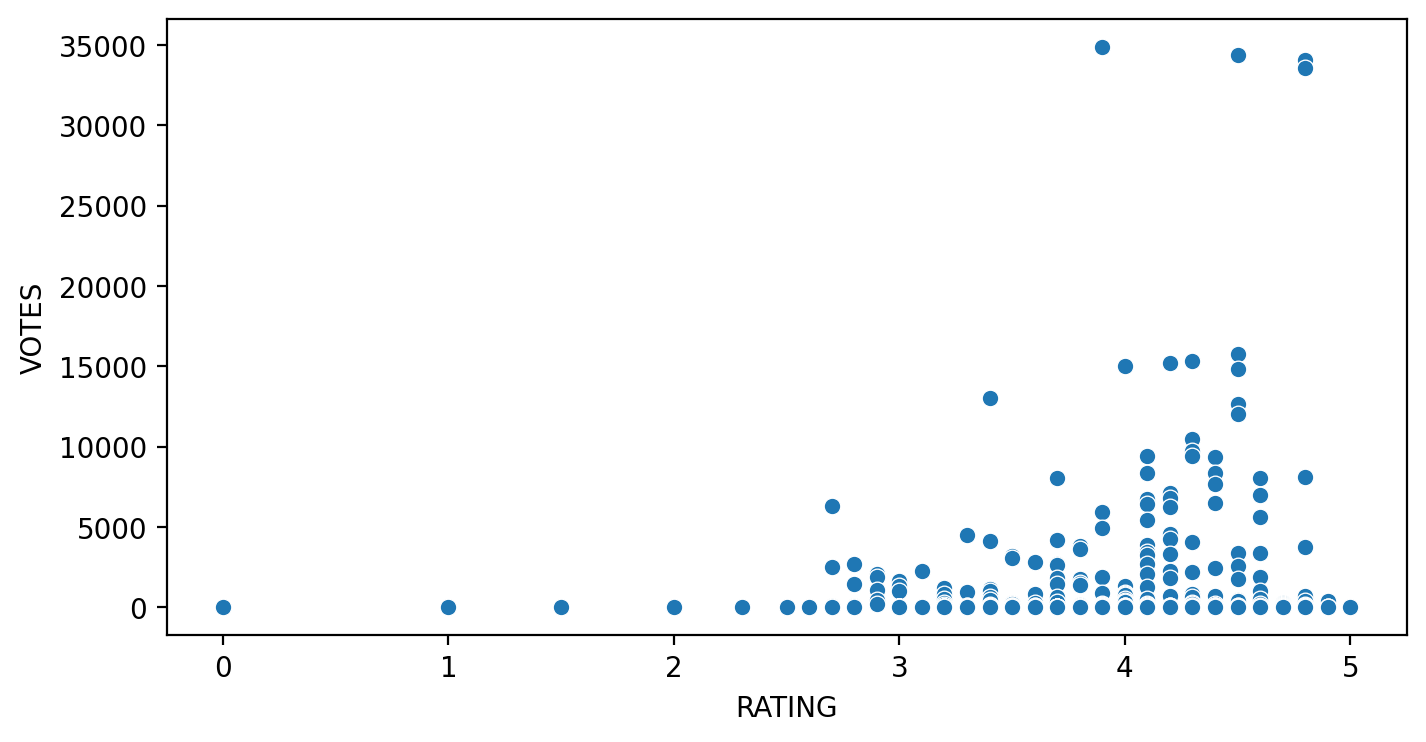

In [49]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [50]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [51]:
fandango['YEAR'] = fandango['FILM'].str[-5:-1]

In [52]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [53]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2012      1
1964      1
2016      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

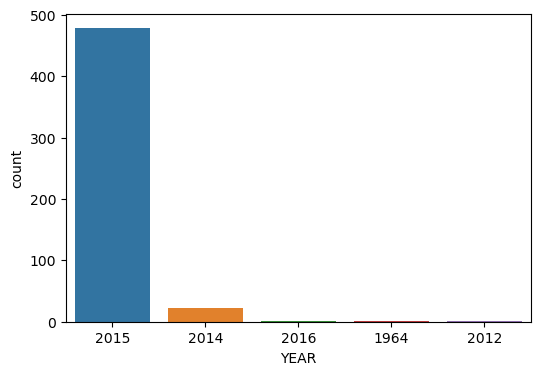

In [54]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=fandango,x='YEAR')

In [55]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [56]:
len(fandango[fandango['VOTES'] == 0])

69

In [57]:
without_zeros_votes = fandango[fandango['VOTES'] > 0]

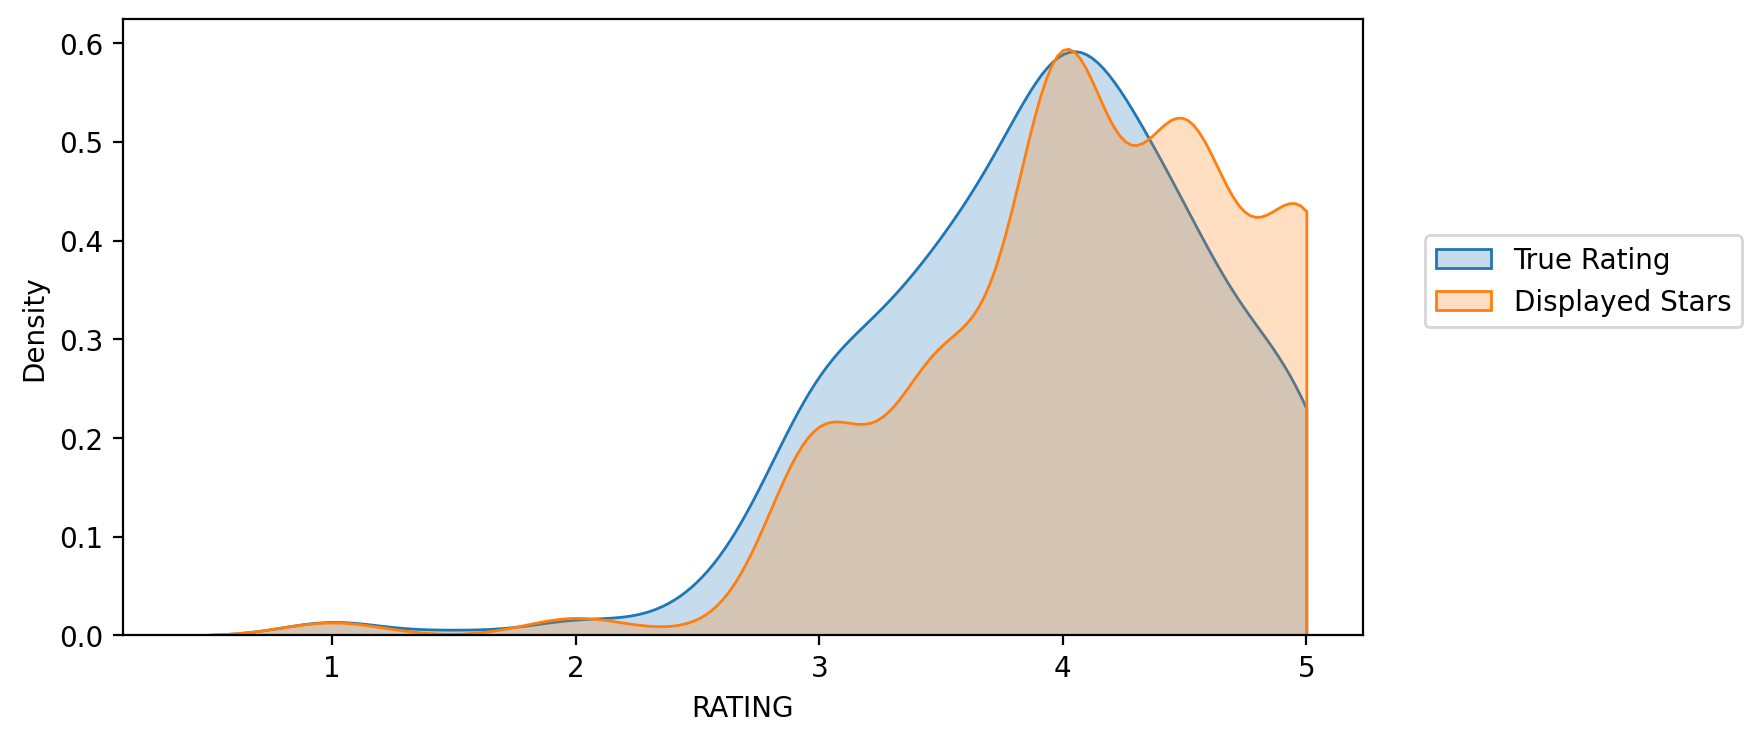

In [58]:
plt.figure(figsize=(8,4),dpi=200)

sns.kdeplot(data=without_zeros_votes, x='RATING', clip=(0,5), fill=True, label='True Rating')
sns.kdeplot(data=without_zeros_votes, x='STARS', clip=(0,5), fill=True, label='Displayed Stars')

plt.legend(loc=(1.05,0.5))

In [59]:
without_zeros_votes['STARS_DIFF'] = without_zeros_votes['STARS'] - without_zeros_votes['RATING']

C:\Users\allan\AppData\Local\Temp\ipykernel_14236\3353979722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_zeros_votes['STARS_DIFF'] = without_zeros_votes['STARS'] - without_zeros_votes['RATING']


In [60]:
without_zeros_votes['STARS_DIFF'] = without_zeros_votes['STARS_DIFF'].round(2)

C:\Users\allan\AppData\Local\Temp\ipykernel_14236\89212934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_zeros_votes['STARS_DIFF'] = without_zeros_votes['STARS_DIFF'].round(2)


In [61]:
without_zeros_votes['STARS_DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

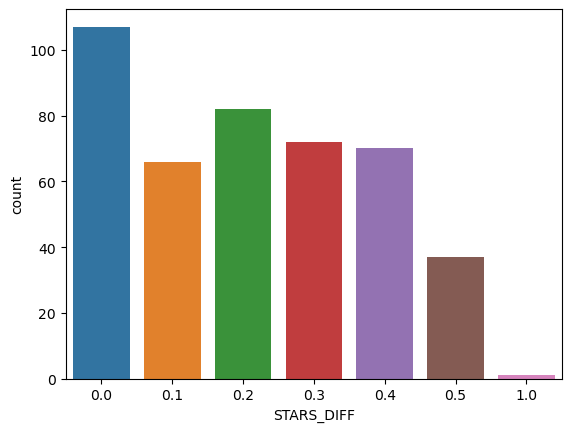

In [62]:
sns.countplot(data=without_zeros_votes, x='STARS_DIFF')

In [63]:
without_zeros_votes[without_zeros_votes['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [65]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [66]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [67]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

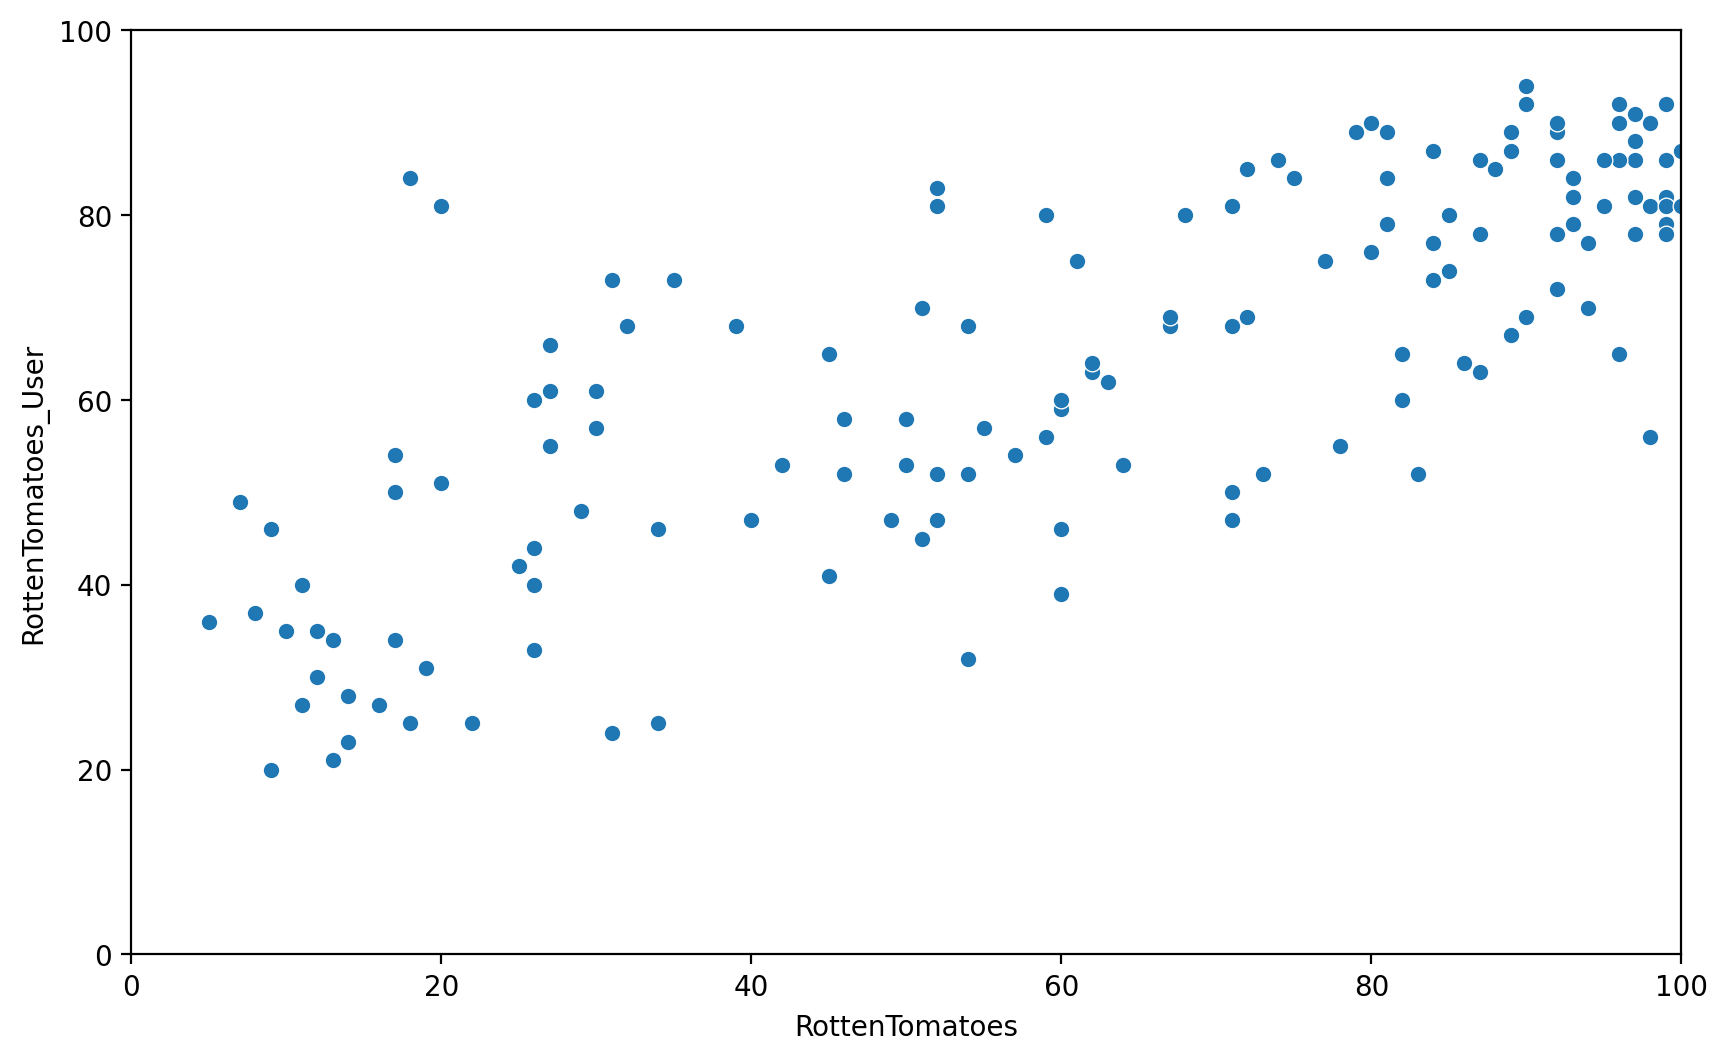

In [72]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [99]:
all_sites['ROTTEN_DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [94]:
all_sites['ROTTEN_DIFF'] = all_sites['ROTTEN_DIFF'].apply(abs)

In [95]:
all_sites['ROTTEN_DIFF'].mean()

15.095890410958905

<AxesSubplot:xlabel='ROTTEN_DIFF', ylabel='Count'>

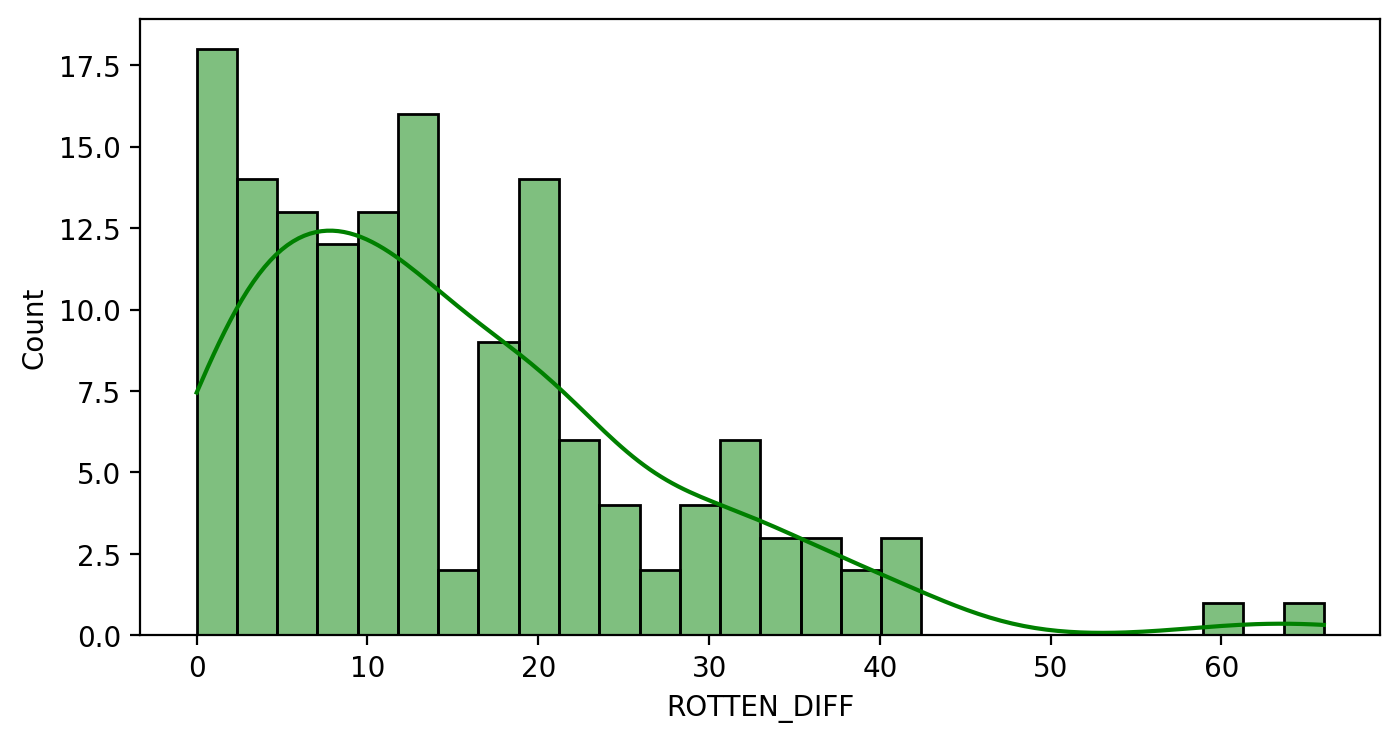

In [97]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(data=all_sites,x='ROTTEN_DIFF',kde=True,bins=28,color='green')

In [105]:
all_sites.nsmallest(5,'ROTTEN_DIFF')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [106]:
all_sites.nlargest(5,'ROTTEN_DIFF')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

(0.0, 10.0)

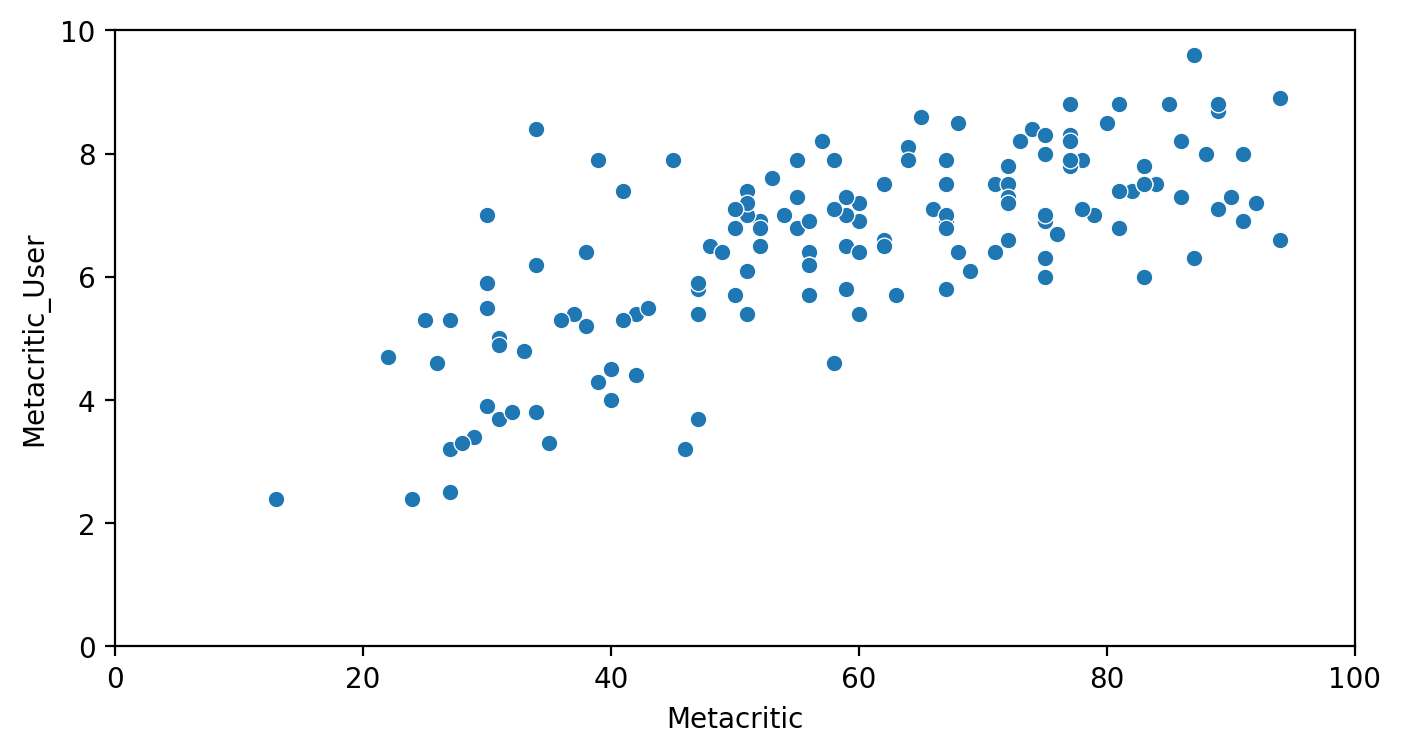

In [114]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

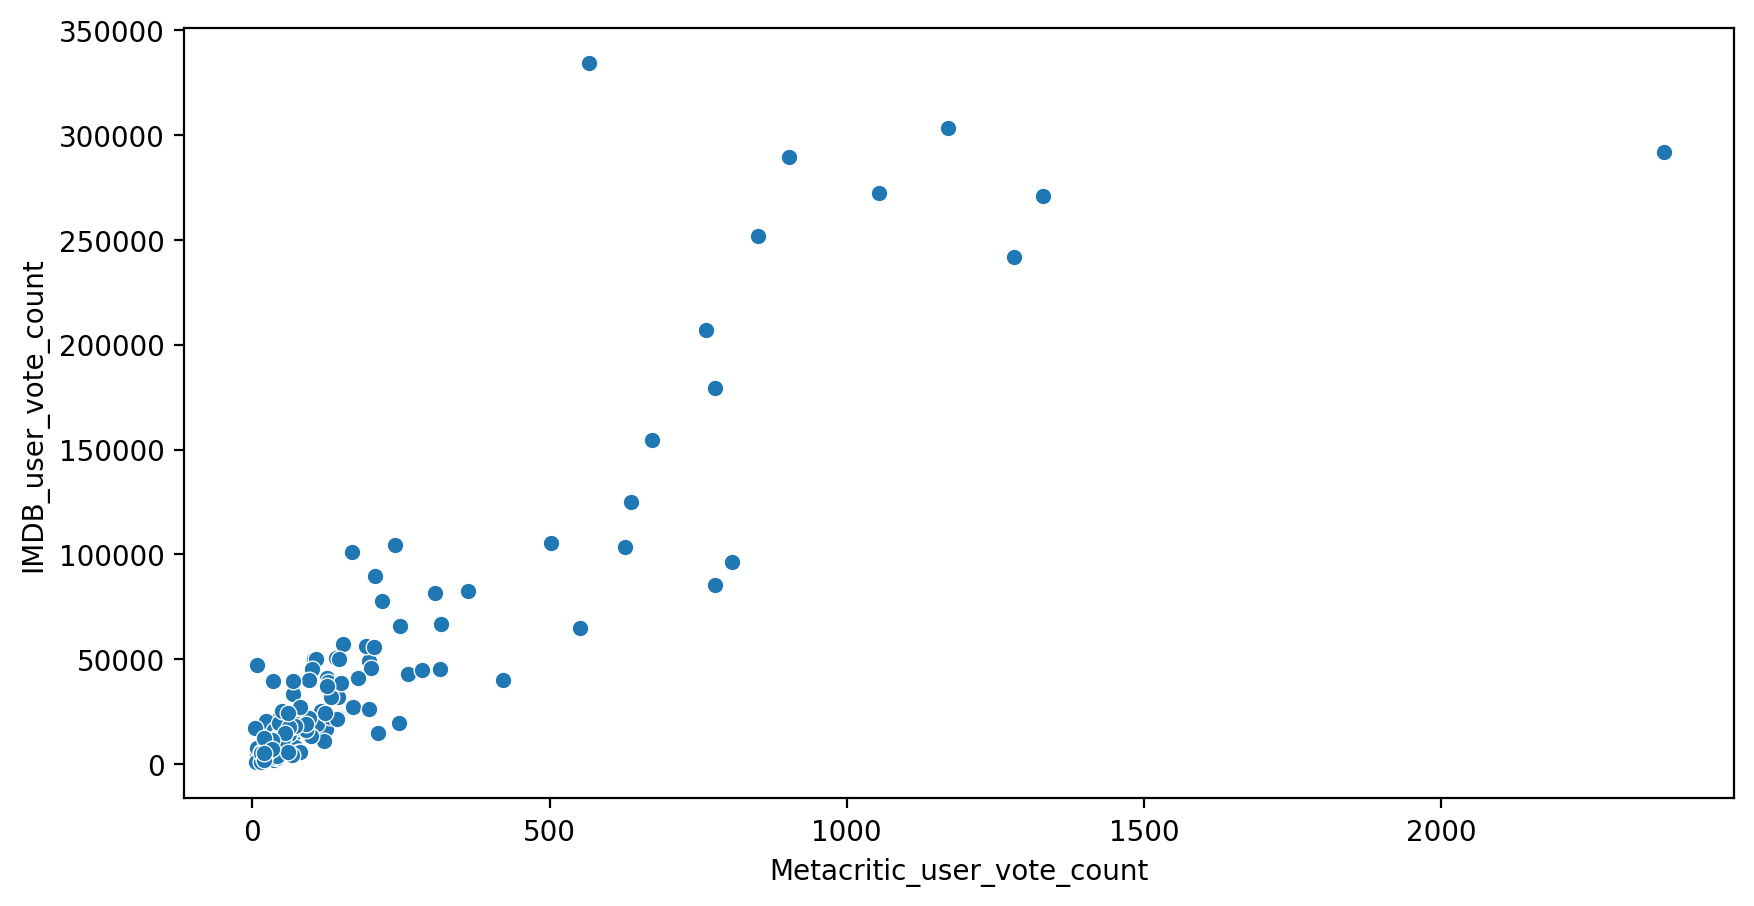

In [116]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [118]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [119]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


#### AFTER STUDY OUR DATAFRAME LET'S COMPARE THE FANDANGO DATA TO THE REST OF THEN

In [120]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [122]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [125]:
df['RT_NORM'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_NORM'] = np.round(df['RottenTomatoes_User']/20,1)

df['IMDB_NORM'] = np.round(df['IMDB']/2,1)

df['MC_NORM'] = np.round(df['Metacritic']/20,1)
df['MCU_NORM'] = np.round(df['Metacritic_User']/2,1)

In [126]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'ROTTEN_DIFF',
       'RT_NORM', 'RTU_NORM', 'IMDB_NORM', 'MC_NORM', 'MCU_NORM'],
      dtype='object')

In [127]:
norm_scores = df[['RT_NORM', 'RTU_NORM', 'IMDB_NORM', 'MC_NORM', 'MCU_NORM','STARS', 'RATING']]

In [129]:
norm_scores.head()

,RT_NORM,RTU_NORM,IMDB_NORM,MC_NORM,MCU_NORM,STARS,RATING
0,1.2,2.1,2.1,2.3,1.6,4.0,3.9
1,3.6,4.0,3.6,3.0,3.5,4.5,4.5
2,3.6,4.2,3.7,3.6,3.3,5.0,4.8
3,4.0,4.2,3.7,3.4,3.4,5.0,4.8
4,4.9,4.5,4.3,4.7,4.4,4.5,4.5


In [144]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

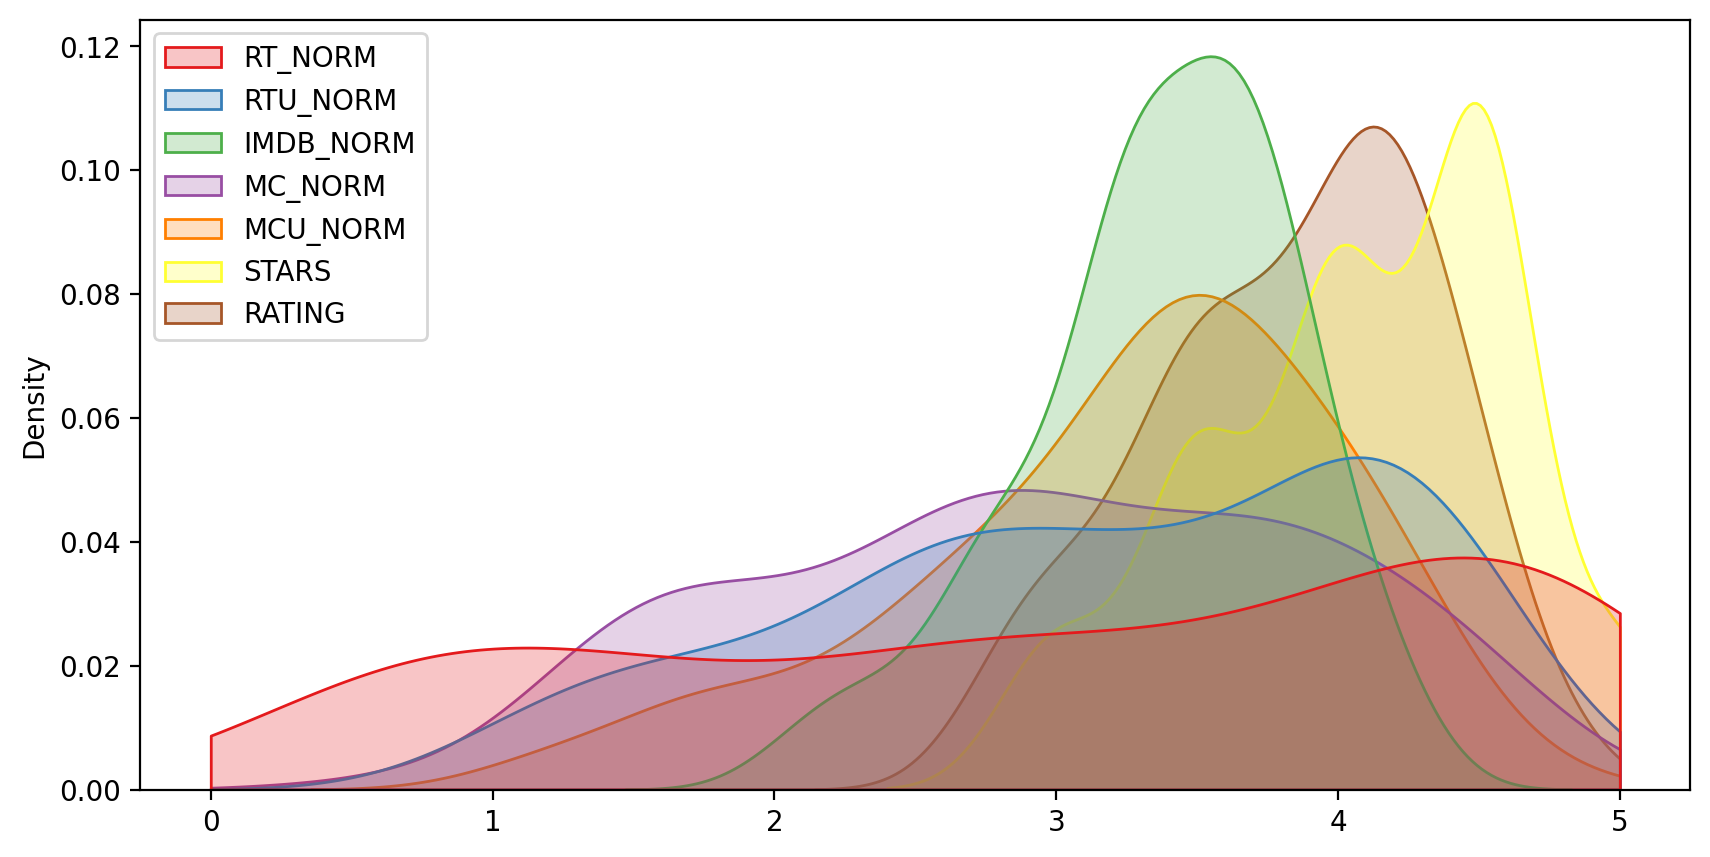

In [147]:
fig, ax = plt.subplots(figsize=(10,5),dpi=200)

sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')

move_legend(ax, "upper left")

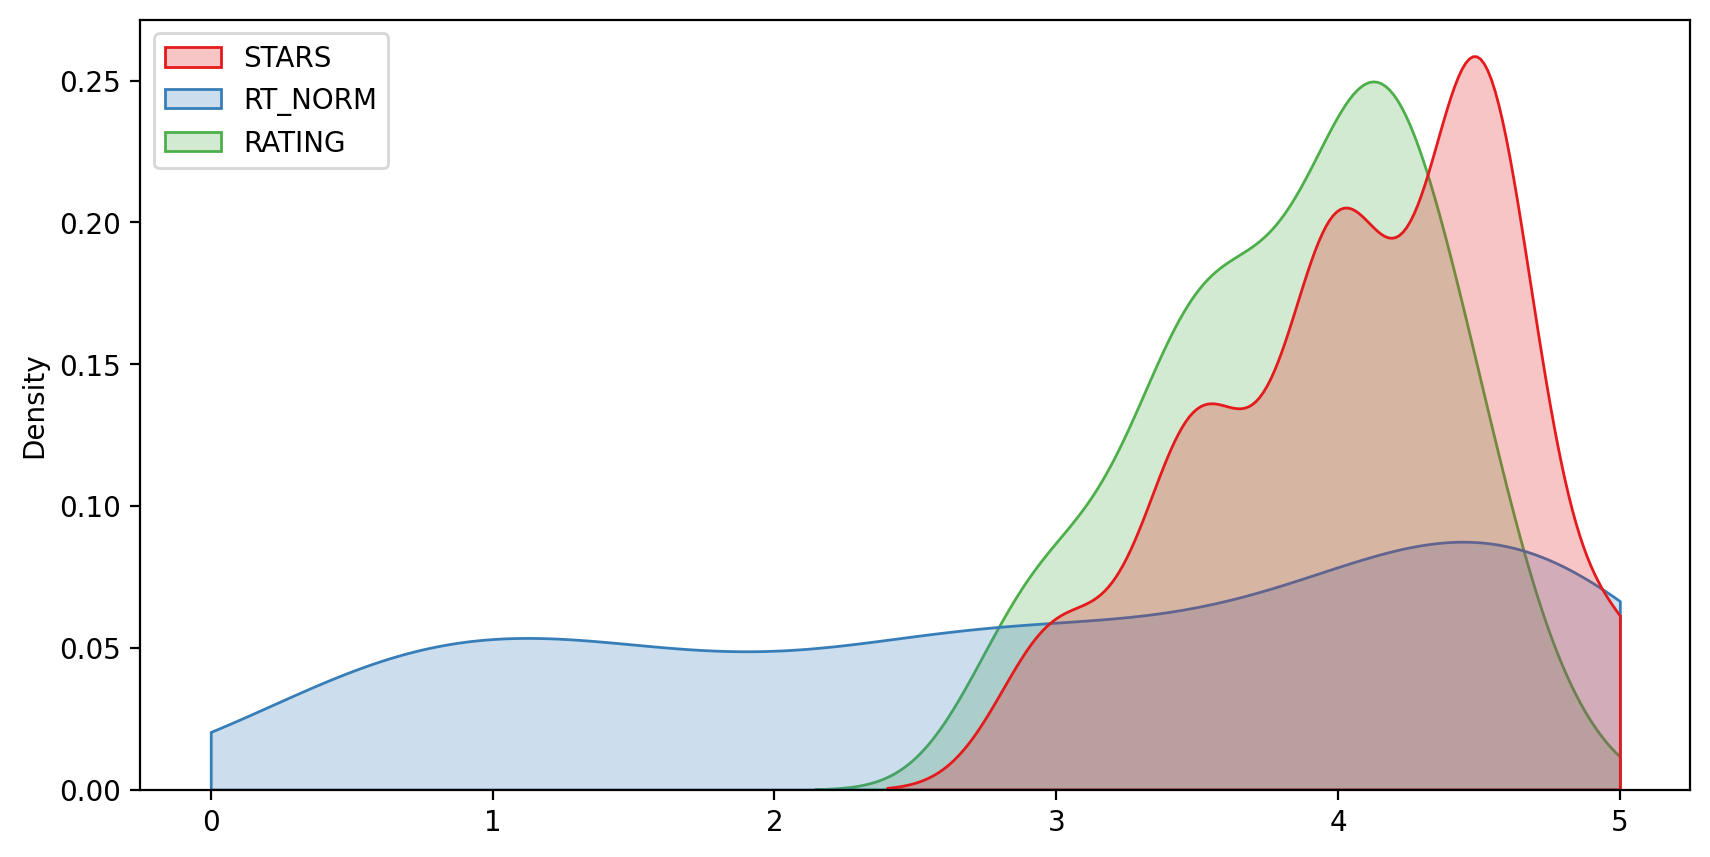

In [152]:
fig, ax = plt.subplots(figsize=(10,5),dpi=200)

sns.kdeplot(data=norm_scores[['STARS','RT_NORM','RATING']],clip=[0,5],shade=True,palette='Set1')

move_legend(ax, "upper left")

<AxesSubplot:ylabel='Count'>

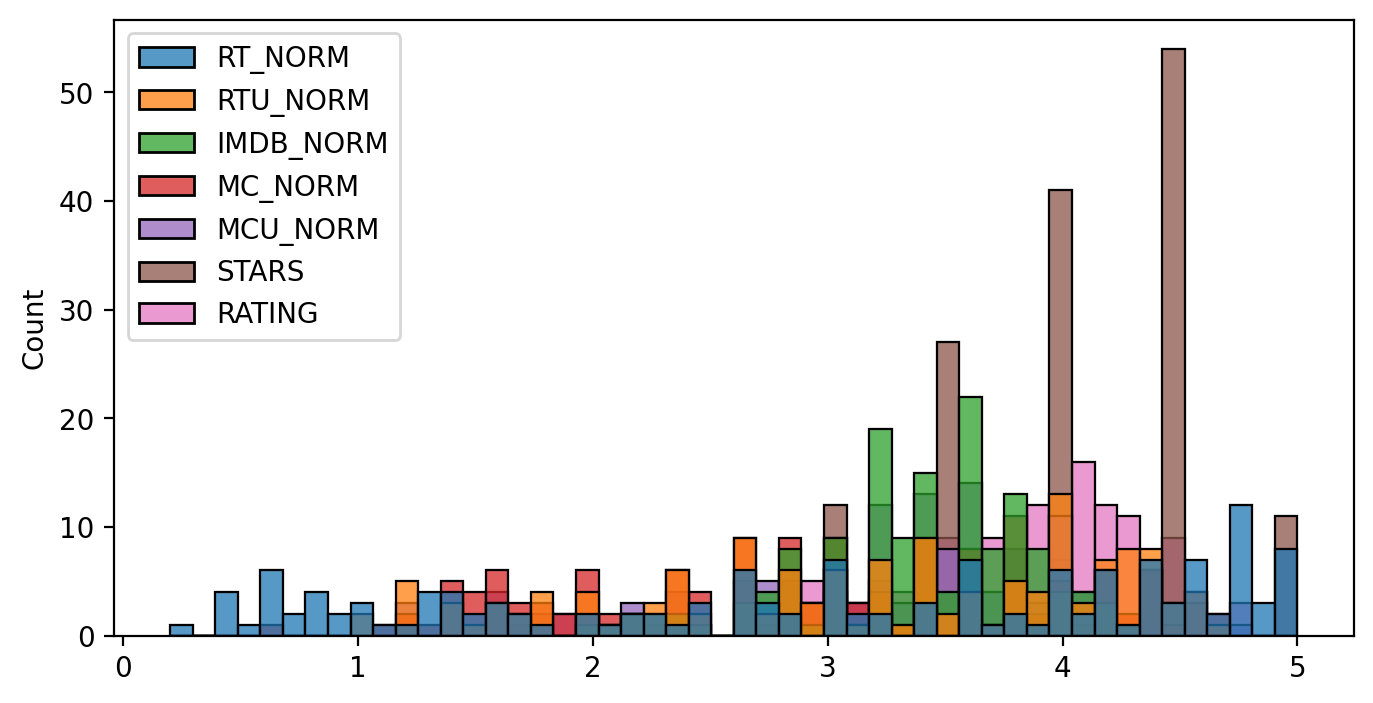

In [155]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(data=norm_scores,bins=50)

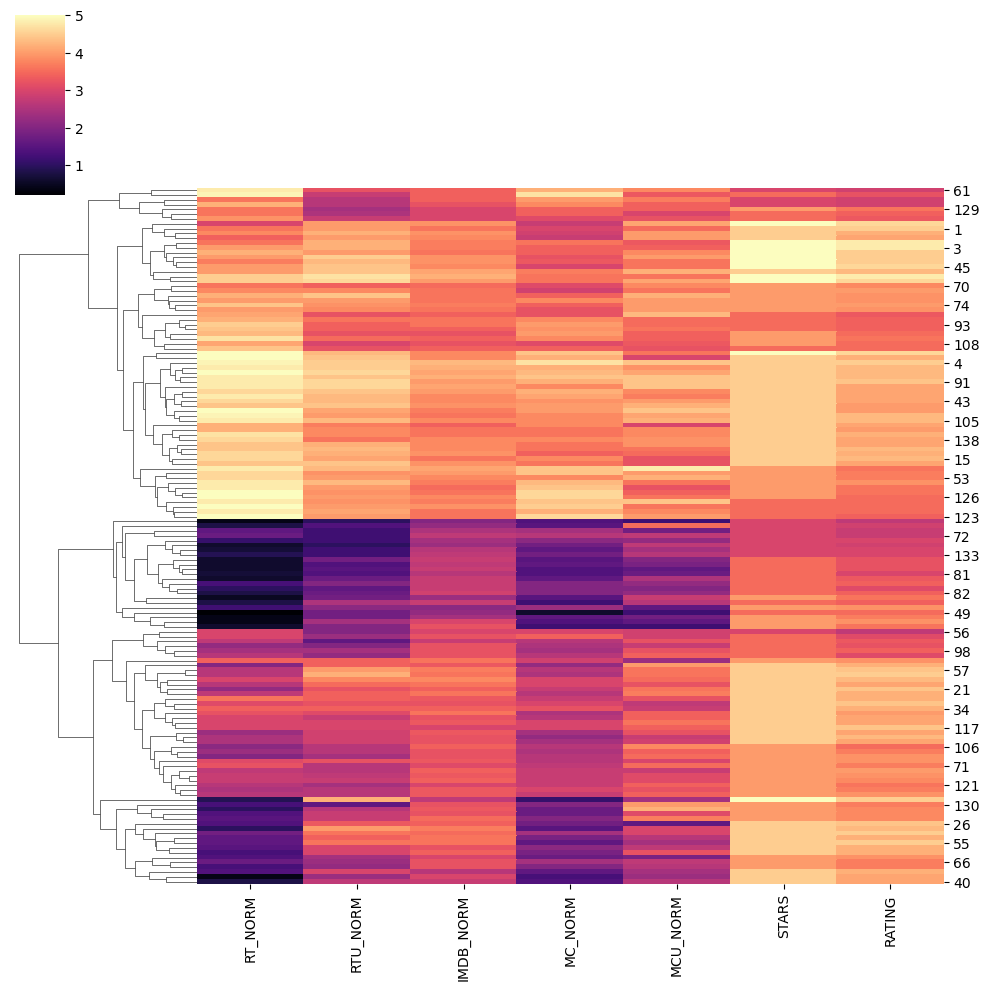

In [156]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [165]:
norm_films = df[['FILM','RT_NORM', 'RTU_NORM', 'IMDB_NORM', 'MC_NORM', 'MCU_NORM', 'STARS',
       'RATING']]

In [166]:
norm_films.head()

,FILM,RT_NORM,RTU_NORM,IMDB_NORM,MC_NORM,MCU_NORM,STARS,RATING
0,Fifty Shades of Grey (2015),1.2,2.1,2.1,2.3,1.6,4.0,3.9
1,Jurassic World (2015),3.6,4.0,3.6,3.0,3.5,4.5,4.5
2,American Sniper (2015),3.6,4.2,3.7,3.6,3.3,5.0,4.8
3,Furious 7 (2015),4.0,4.2,3.7,3.4,3.4,5.0,4.8
4,Inside Out (2015),4.9,4.5,4.3,4.7,4.4,4.5,4.5


In [167]:
bad_films = norm_films.nsmallest(10,'RT_NORM')

<AxesSubplot:ylabel='Density'>

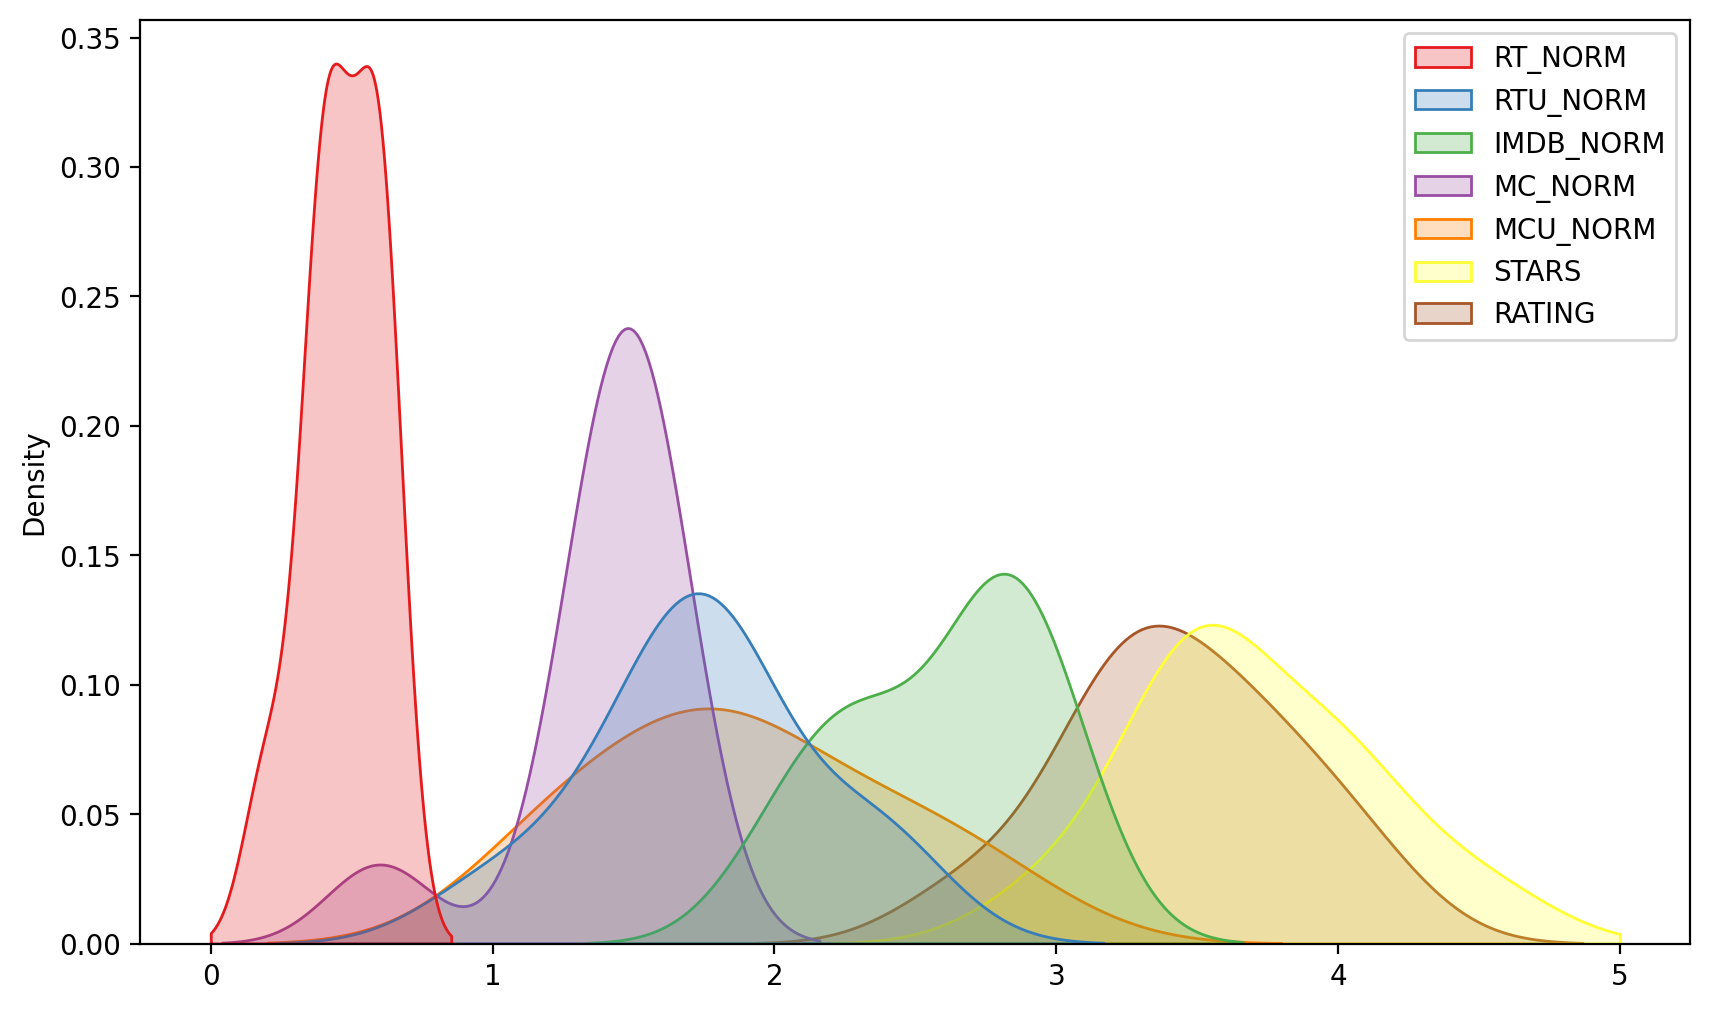

In [170]:
plt.figure(figsize=(10,6),dpi=200)
sns.kdeplot(data=bad_films,clip=[0,5],shade=True,palette='Set1')

In [185]:
bad_films.loc[25]

FILM         Taken 3 (2015)
RT_NORM                 0.4
RTU_NORM                2.3
IMDB_NORM                 3
MC_NORM                 1.3
MCU_NORM                2.3
STARS                   4.5
RATING                  4.1
Name: 25, dtype: object

In [186]:
(3+1.3+2.3+0.4+2.3)/5

1.86

**after all this graphs we can have a cleary conclusion, the fandango give high numbers even for a bad movies, they give a 4.5 to a movie who has 1.86 of mean in other portals**